In [1]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.transform import from_origin
import pyproj
from shapely.affinity import scale
import folium
import shutil

/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
from data_collection import *
from functions import *

/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Shapefile specifications

In [3]:
source_folder = '../data/external/shp/rivers/'
#source_folder = '../data/external/shp/rivers/LaBroye_shapefile'

In [4]:
import fiona
import geopandas as gpd
from shapely.geometry import shape

rivers = {}
for subdir, dirs, files in os.walk(source_folder):
    if len(dirs) == 0:
        with fiona.open(subdir, 'r') as src:
            # Extraer geometrías y atributos
            features = []
            for feature in src:
                geom = shape(feature['geometry'])  # Convertir la geometría a un objeto Shapely
                properties = feature['properties']  # Obtener los atributos
                properties['geometry'] = geom  # Añadir la geometría a los atributos
                features.append(properties)

            # Convertir la lista de características a un GeoDataFrame
            river = gpd.GeoDataFrame(features, crs="EPSG:2056")
            original_crs = river.crs
            river = river.to_crs("EPSG:4326")
            print(subdir)
            rivers[subdir.split('/')[-1]] = river
            print(river.shape)

/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/1203784991.py:14: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  properties['geometry'] = geom  # Añadir la geometría a los atributos
/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/1203784991.py:14: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  properties['geometry'] = geom  # Añadir la geometría a los atributos
/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/1203784991.py:14: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  properties['geometry'] = geom  # Añadir la geometría a los atributos
/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/1203784991.py:14: FionaDeprecationWarning: instances of this class -- CRS,

../data/external/shp/rivers/Wasserfallenbach
(6, 24)
../data/external/shp/rivers/Eibachli
(3, 24)
../data/external/shp/rivers/Bisse-Neuf
(19, 24)
../data/external/shp/rivers/LaVenoge_shapefile
(13, 16)
../data/external/shp/rivers/le_boiron2
(58, 24)
../data/external/shp/rivers/I_Custiell
(3, 24)
../data/external/shp/rivers/La_Paudeze
(32, 24)
../data/external/shp/rivers/Zauggenbach
(6, 24)
../data/external/shp/rivers/Aletenbach
(8, 24)
../data/external/shp/rivers/Alplibach
(17, 24)
../data/external/shp/rivers/Plattenbach
(10, 24)
../data/external/shp/rivers/swissTLMboiron
(343, 50)
../data/external/shp/rivers/LaBroye_shapefile
(62, 16)


/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/1203784991.py:14: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  properties['geometry'] = geom  # Añadir la geometría a los atributos
/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/1203784991.py:14: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  properties['geometry'] = geom  # Añadir la geometría a los atributos


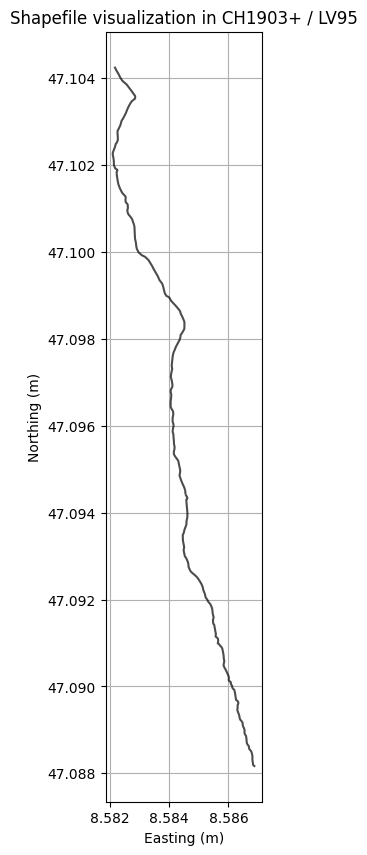

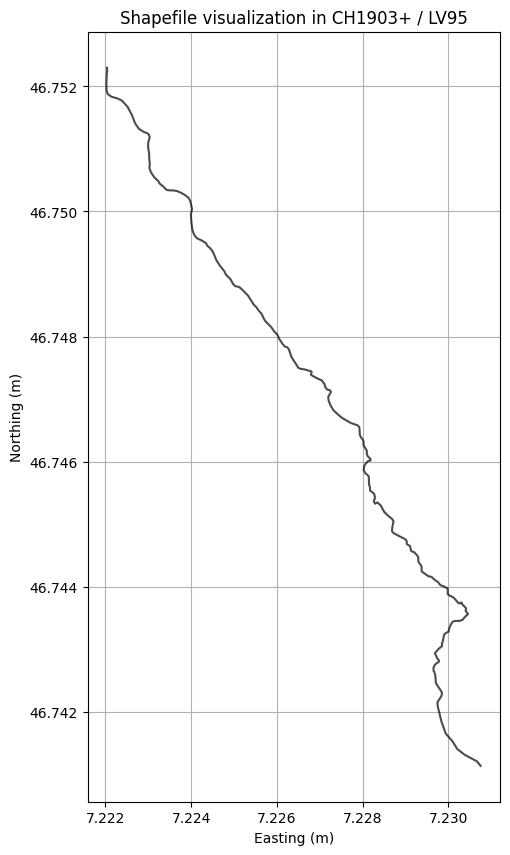

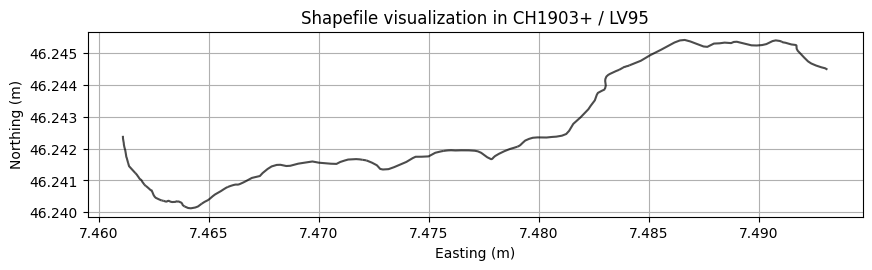

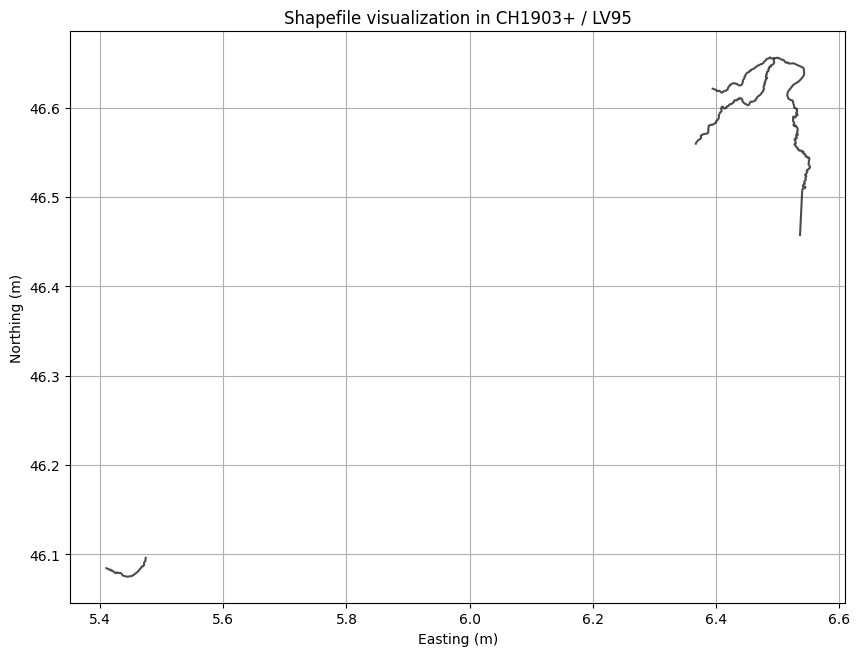

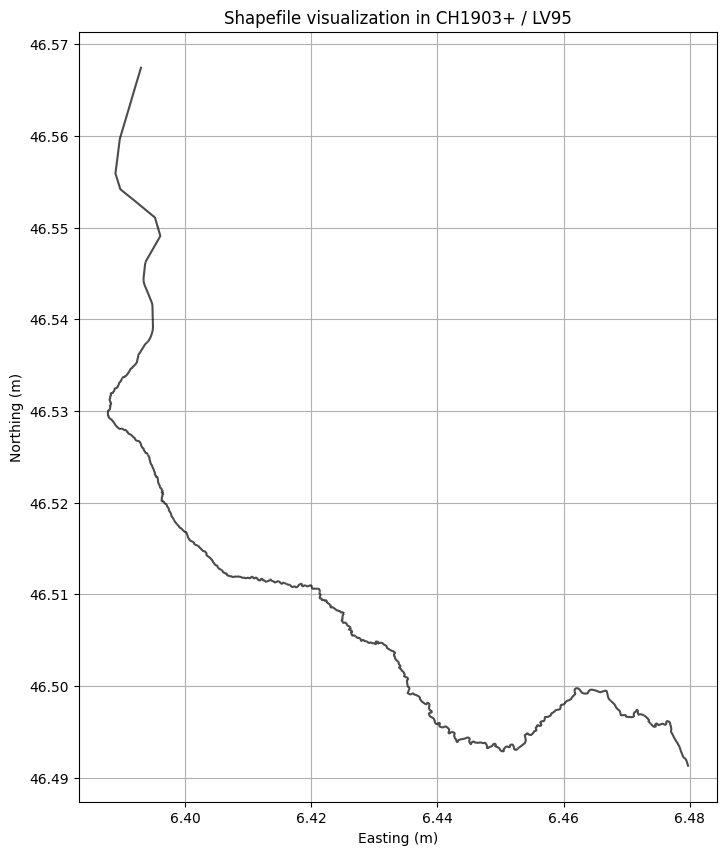

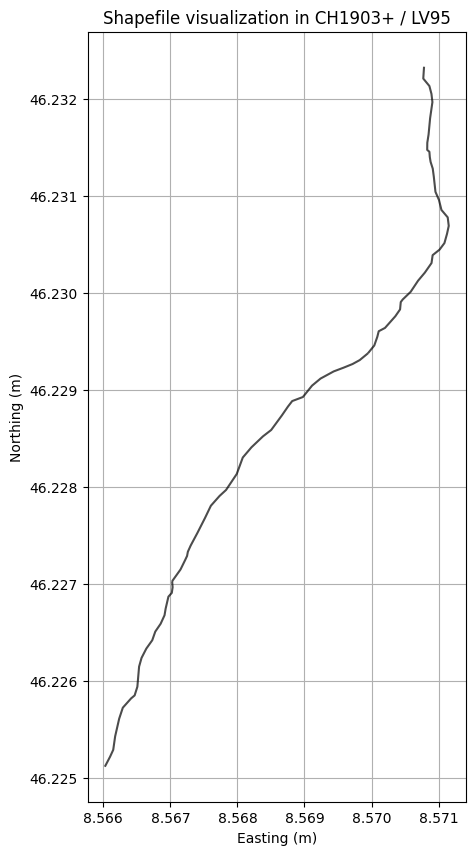

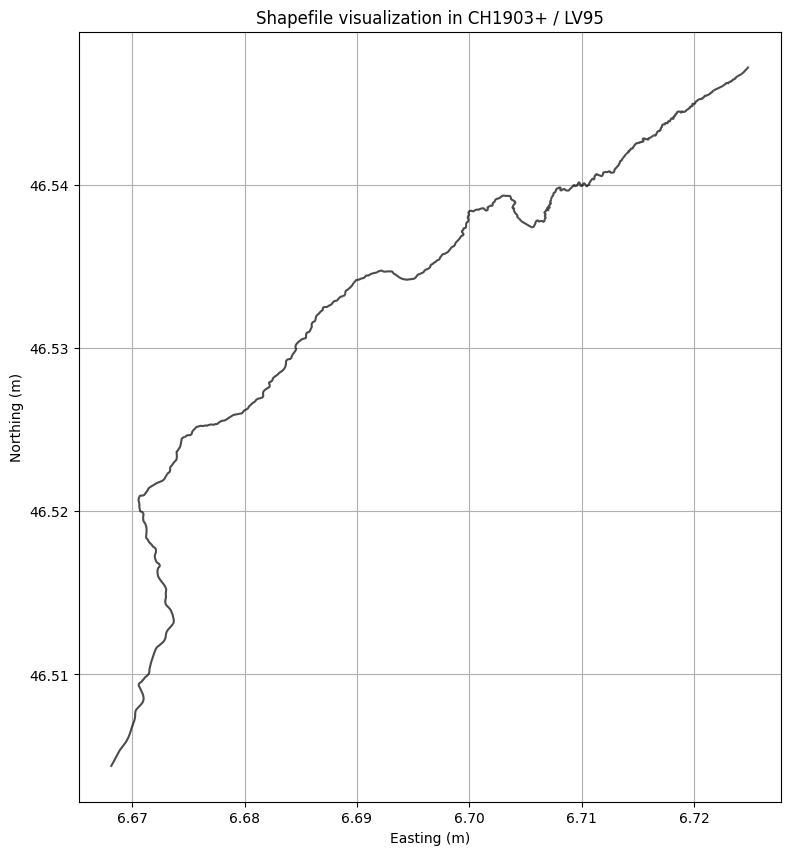

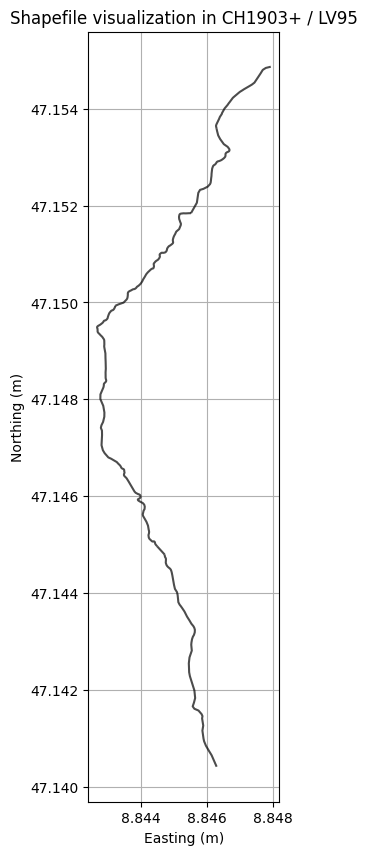

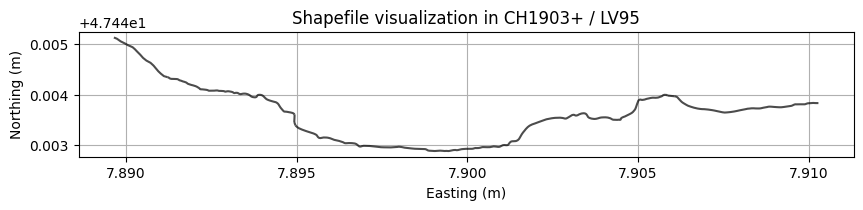

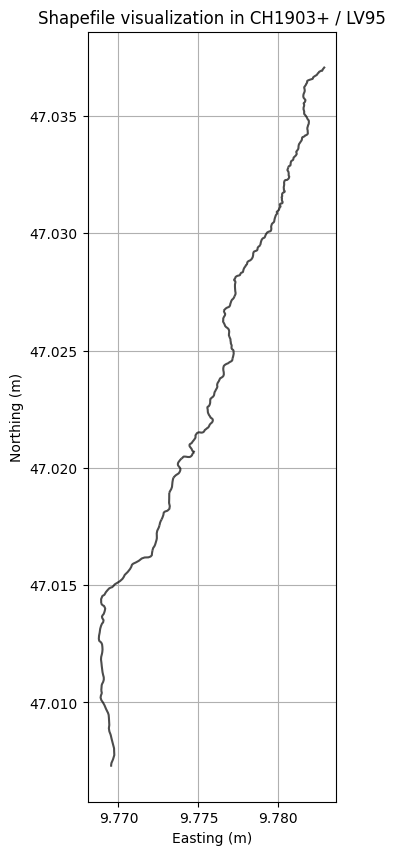

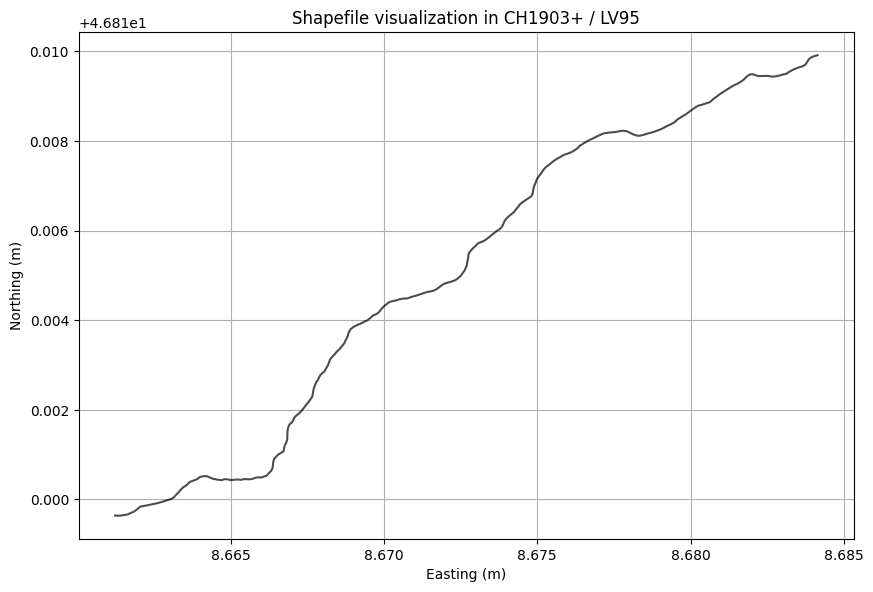

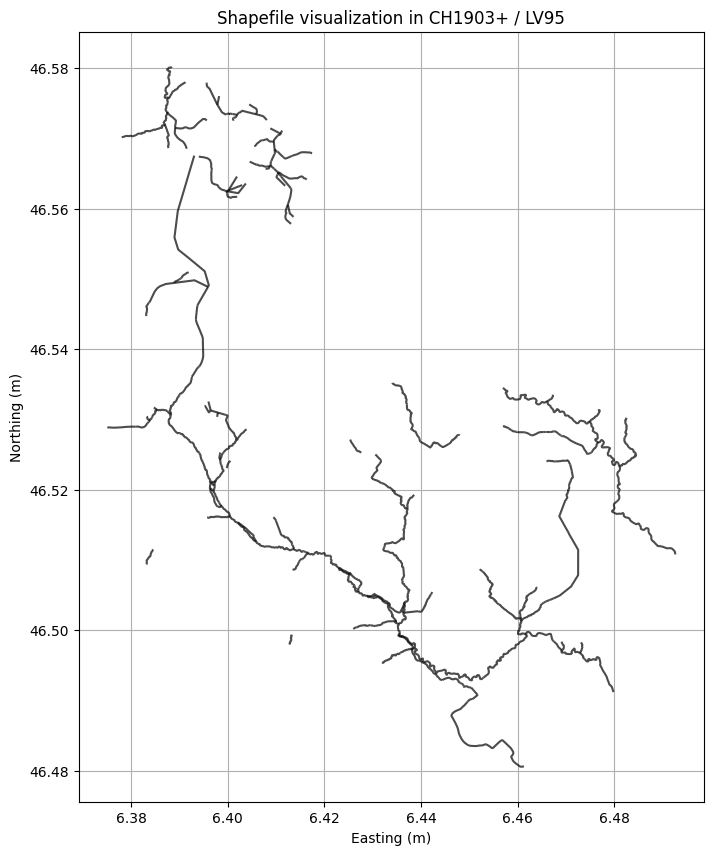

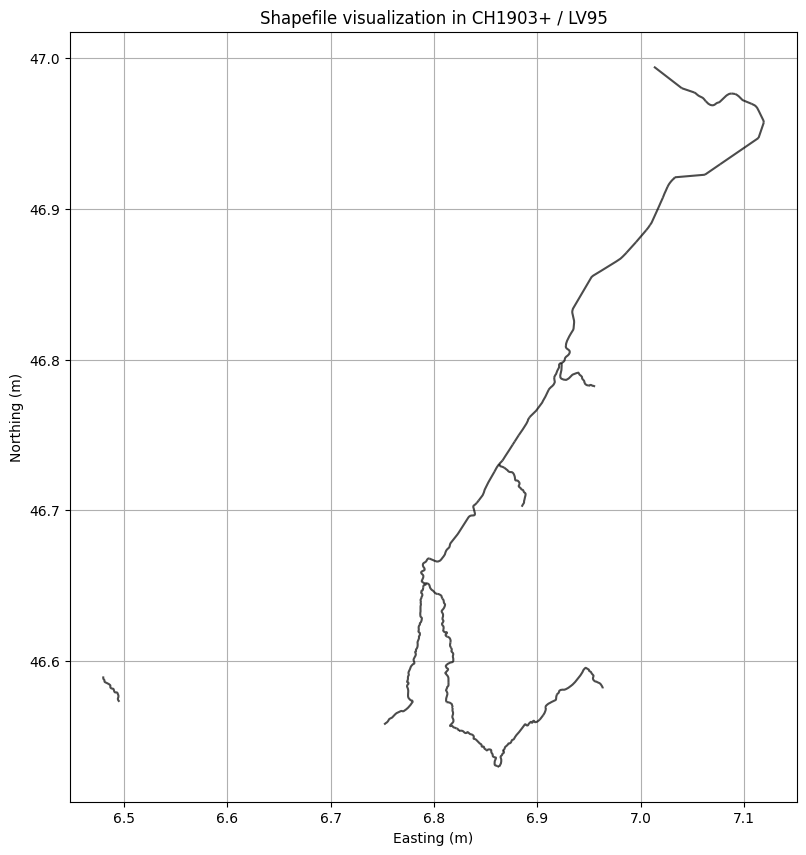

In [5]:
for r in rivers.values():
    fig, ax = plt.subplots(figsize=(10, 10))
    r.plot(ax=ax, edgecolor='k', alpha=0.7)
    ax.set_title('Shapefile visualization in CH1903+ / LV95')
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    plt.grid(True)
    plt.show()

### Fix shapefiles coordinates

/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/3815255854.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance_to_centroid'] = gdf.geometry.distance(centroid)


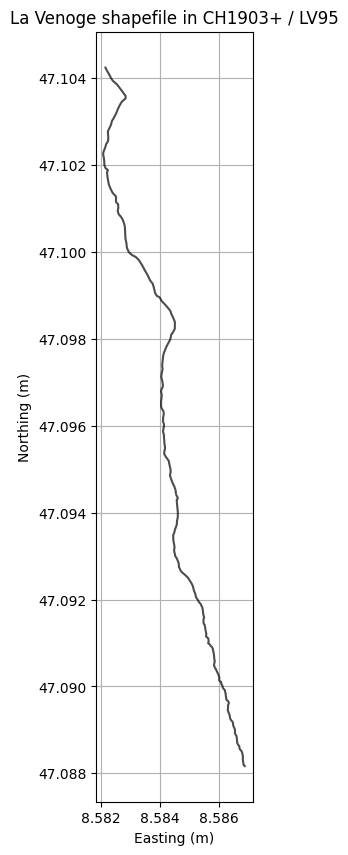

/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/3815255854.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance_to_centroid'] = gdf.geometry.distance(centroid)


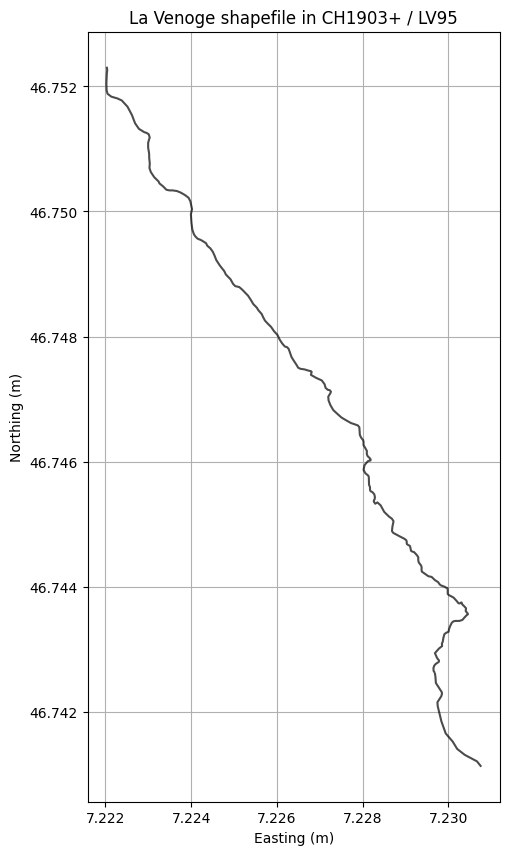

/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/3815255854.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance_to_centroid'] = gdf.geometry.distance(centroid)


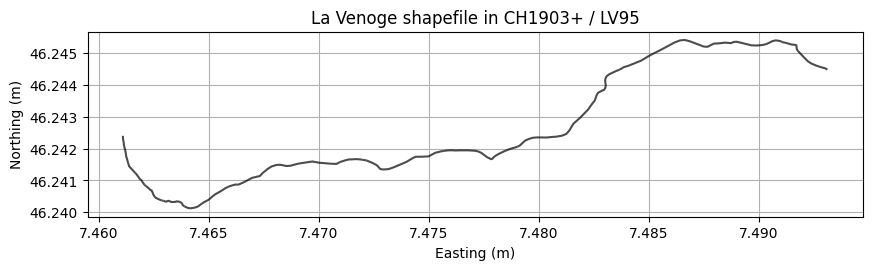

/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/3815255854.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance_to_centroid'] = gdf.geometry.distance(centroid)


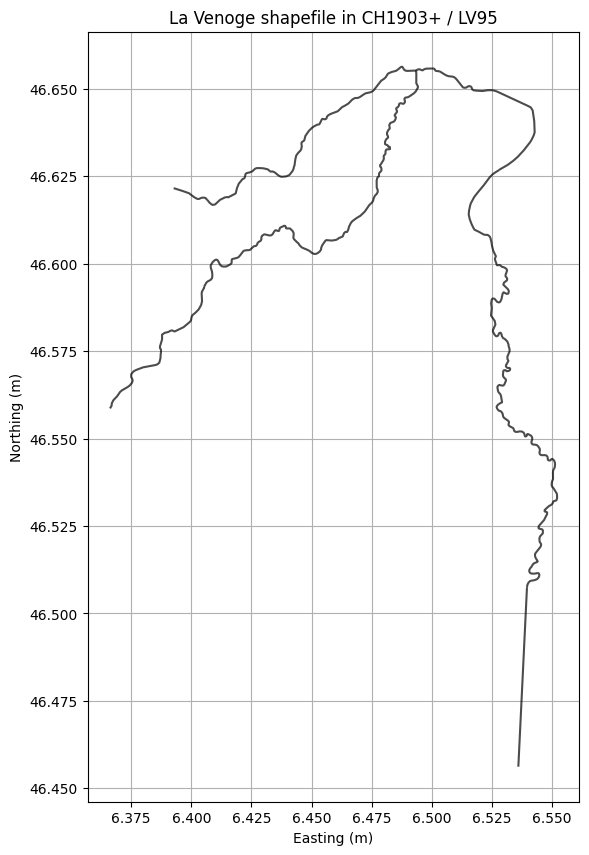

/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/3815255854.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance_to_centroid'] = gdf.geometry.distance(centroid)


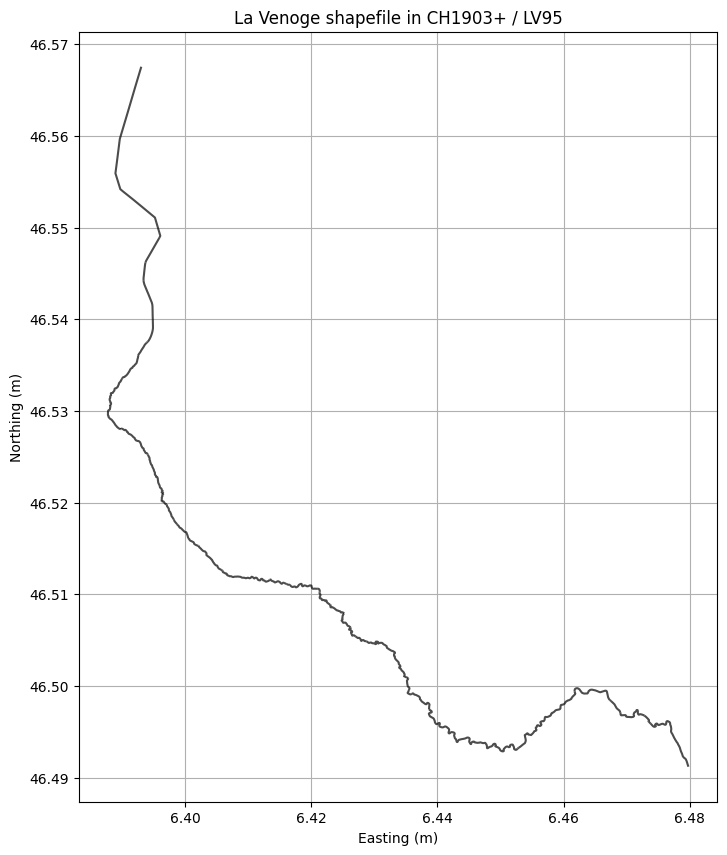

/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/3815255854.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance_to_centroid'] = gdf.geometry.distance(centroid)


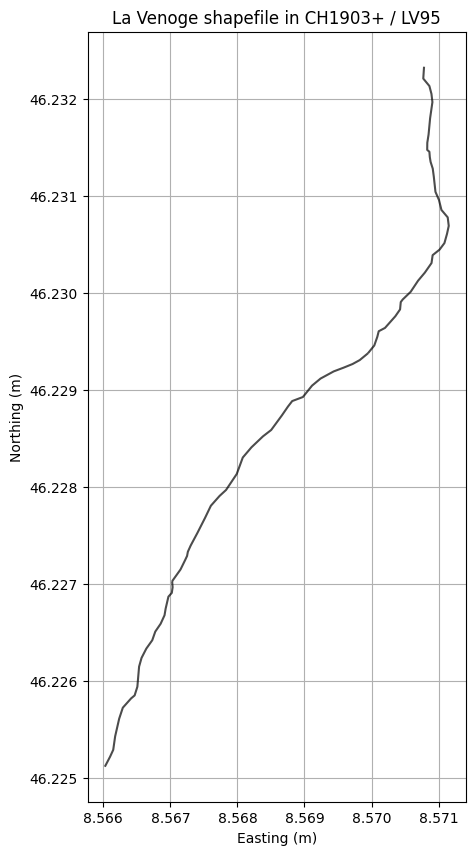

/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/3815255854.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance_to_centroid'] = gdf.geometry.distance(centroid)


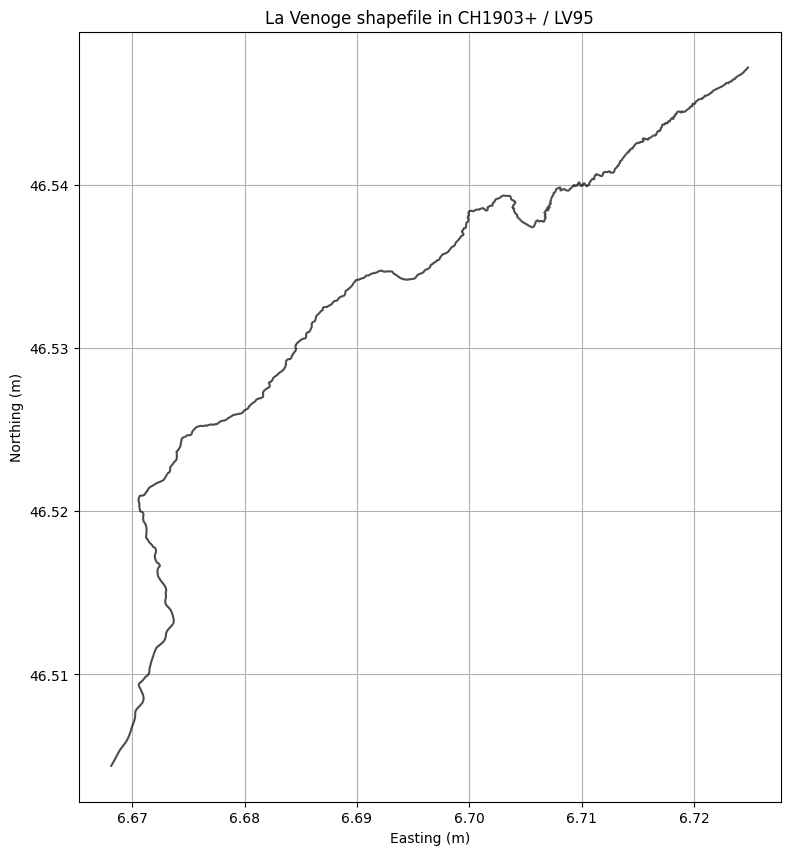

/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/3815255854.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance_to_centroid'] = gdf.geometry.distance(centroid)


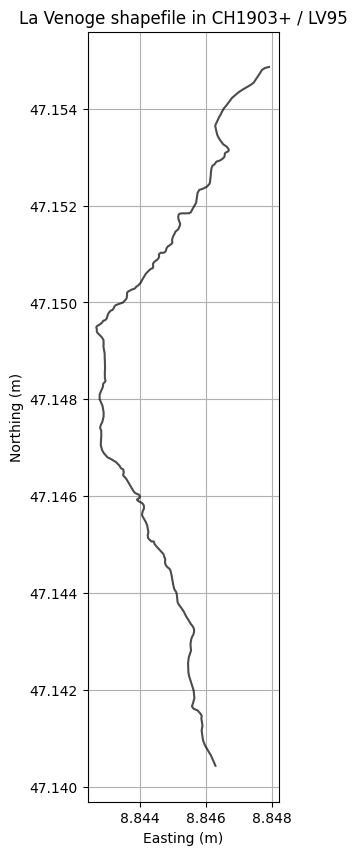

/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/3815255854.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance_to_centroid'] = gdf.geometry.distance(centroid)


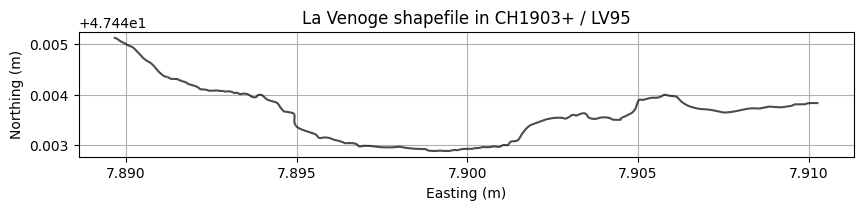

/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/3815255854.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance_to_centroid'] = gdf.geometry.distance(centroid)


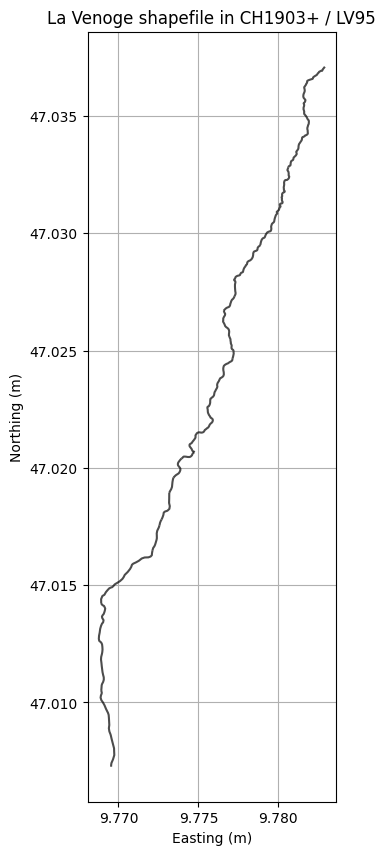

/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/3815255854.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance_to_centroid'] = gdf.geometry.distance(centroid)


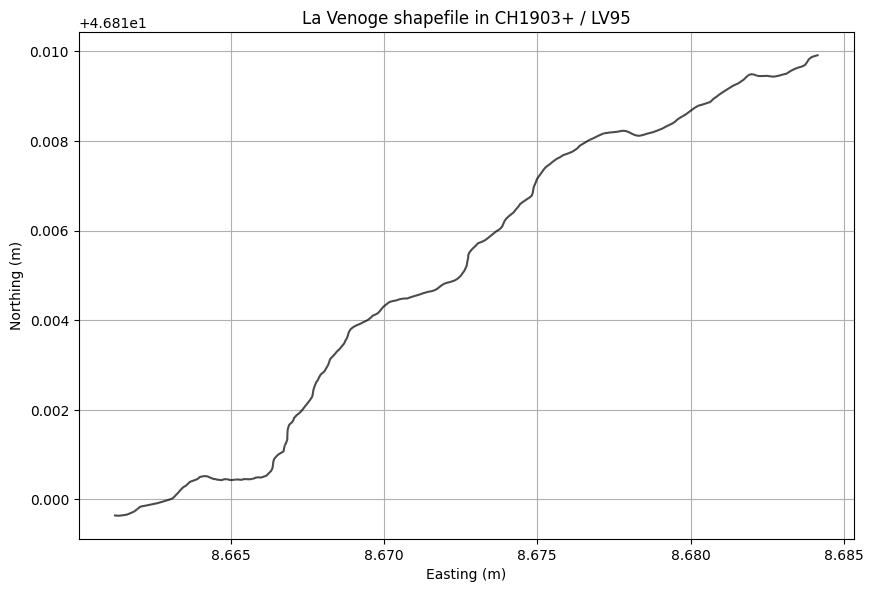

/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/3815255854.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance_to_centroid'] = gdf.geometry.distance(centroid)


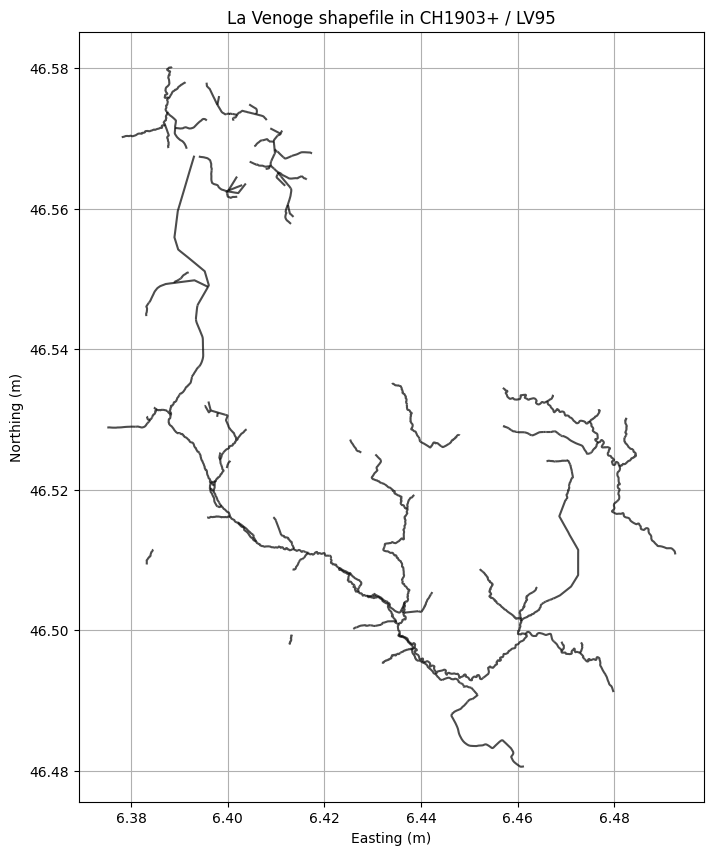

/var/folders/lx/01q73krn1md9zqcwvy3rqlqh0000gn/T/ipykernel_36207/3815255854.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['distance_to_centroid'] = gdf.geometry.distance(centroid)


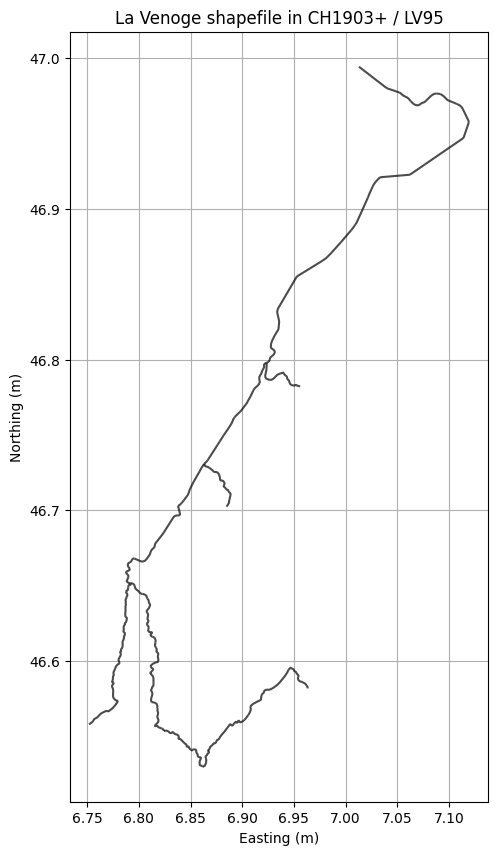

In [14]:
for k, r in rivers.items():
    # Load the shapefile
    gdf = r

    # Calculate the centroid of all LineStrings
    centroid = gdf.unary_union.centroid

    # Calculate the distance of each LineString to the centroid
    gdf['distance_to_centroid'] = gdf.geometry.distance(centroid)

    # Option 1: Remove LineStrings that are farther than the 90th percentile distance
    if k == 'LaBroye_shapefile':
        threshold_distance = gdf['distance_to_centroid'].quantile(0.99)
        gdf = gdf[gdf['distance_to_centroid'] <= threshold_distance]
    elif k == 'LaVenoge_shapefile':
        threshold_distance = gdf['distance_to_centroid'].quantile(0.9)
    # Filter LineStrings closer to the centroid (within the threshold)
        gdf = gdf[gdf['distance_to_centroid'] <= threshold_distance]

    # Option 2: You can also set a manual threshold, e.g., 500 meters
    # filtered_gdf = gdf[gdf['distance_to_centroid'] <= 500]
    rivers[k] = gdf
    

    fig, ax = plt.subplots(figsize=(10, 10))
    rivers[k].plot(ax=ax, edgecolor='k', alpha=0.7)
    ax.set_title('La Venoge shapefile in CH1903+ / LV95')
    plt.xlabel('Easting (m)')
    plt.ylabel('Northing (m)')
    plt.grid(True)
    plt.show()

## Obtain LST images

Load the water temperature database filtered by dates and regions.

In [7]:
gdf_points = gpd.read_file('../data/external/wt_filtered/wt_filtered.geojson')

In [8]:
gdf_points.describe()

,time,longitude,latitude,waterTemperature
count,172044,172044.000000,172044.000000,172044.000000
mean,2015-07-16 05:33:20,8.208333,46.791667,7.913892
min,2011-01-31 00:00:00,5.791666,45.708332,0.100000
25%,2013-04-22 12:00:00,6.958334,46.208332,2.198152
50%,2015-07-15 12:00:00,8.208333,46.791668,6.564645
75%,2017-10-07 18:00:00,9.458333,47.375000,12.818750
max,2019-12-31 00:00:00,10.625000,47.875000,26.724939
std,NaN,1.419120,0.649075,6.369109


In [9]:
unique_dates = gdf_points.time.dt.strftime('%Y-%m').unique()

In [10]:
unique_dates

array(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', 

#### Evalscript and sentinelhub request

In [11]:
evalscript_lst = """
    //VERSION=3 (auto-converted from 1)
    //// STARTING OPTIONS
    // choose on basis of which band (B10 or B11) LST mapping will be done
    var band = "B10";

    // for analysis of one image (OE Browser), choose option=0. In case of MULTI-TEMPORAL analyis, option values are following:
    // 0 - outputs average LST in selected timeline (% of cloud coverage should be low, e.g. < 10%)
    // 1 - outputs maximum LST in selected timeline (% of cloud coverage can be high)
    // 2 - outputs standard deviation LST in selected timeline; minTemp and highTemp are overwritten with values 0 and 10 (% of cloud coverage should be low, e.g. < 5%)
    var option = 0;

    // minimum and maximum values for output colour chart red to white for temperature in °C. Option 2 overwrites this selection!
    var minC = 0;
    var maxC = 50;


    ////INPUT DATA - FOR BETTER RESULTS, THE DATA SHOULD BE ADJUSTED
    // NVDIs for bare soil and NDVIv for full vegetation
    // Note: NVDIs for bare soil and NDVIv for full vegetation are needed to be evaluated for every scene. However in the custom script, default values are set regarding:
    // https://profhorn.meteor.wisc.edu/wxwise/satmet/lesson3/ndvi.html
    // https://www.researchgate.net/post/Can_anyone_help_me_to_define_a_range_of_NDVI_value_to_extract_bare_soil_pixels_for_Landsat_TM
    // NVDIs=0.2, NDVIv=0.8
    // other source suggests global values: NVDIs=0.2, NDVIv=0.5; https://www.researchgate.net/publication/296414003_Algorithm_for_Automated_Mapping_of_Land_Surface_Temperature_Using_LANDSAT_8_Satellite_Data
    var NDVIs = 0.2;
    var NDVIv = 0.8;

    // emissivity
    var waterE = 0.991;
    var soilE = 0.966;
    var vegetationE = 0.973;
    //var buildingE=0.962;
    var C = 0.009; //surface roughness, https://www.researchgate.net/publication/331047755_Land_Surface_Temperature_Retrieval_from_LANDSAT-8_Thermal_Infrared_Sensor_Data_and_Validation_with_Infrared_Thermometer_Camera

    //central/mean wavelength in meters, B10 or B11
    var bCent = (band == "B10") ? 0.000010895 : 0.000012005;

    // rho =h*c/sigma=PlanckC*velocityLight/BoltzmannC
    var rho = 0.01438; // m K

    //// visualization
    // if result should be std dev (option=2), overwrite minMaxC.
    if (option == 2) {
      minC = 0;
      maxC = 25;
    }
    let viz = ColorGradientVisualizer.createRedTemperature(minC, maxC);


    function setup() {
      return {
        input: [{
          bands: [
            "B03",
            "B04",
            "B05",
            "B10",
            "B11"
          ]
        }],
        mosaicking: "ORBIT",
        output: { bands: 3 }
      }
    }


    //emissivity calc
    //https://www.researchgate.net/publication/296414003_Algorithm_for_Automated_Mapping_of_Land_Surface_Temperature_Using_LANDSAT_8_Satellite_Data
    //https://www.academia.edu/27239873/Investigating_Land_Surface_Temperature_Changes_Using_Landsat_Data_in_Konya_Turkey
    function LSEcalc(NDVI, Pv) {
      var LSE;
      if (NDVI < 0) {
        //water
        LSE = waterE;
      } else if (NDVI < NDVIs) {
        //soil
        LSE = soilE;
      } else if (NDVI > NDVIv) {
        //vegetation
        LSE = vegetationE;
      } else {
        //mixtures of vegetation and soil
        LSE = vegetationE * Pv + soilE * (1 - Pv) + C;
      }
      return LSE;
    }

    function evaluatePixel(samples) {
      // starting values max, avg, stdev, reduce N, N for multi-temporal
      var LSTmax = -999;
      var LSTavg = 0;
      var LSTstd = 0;
      var reduceNavg = 0;
      var N = samples.length;

      //to caputure all values of one pixel for for whole timeline in mosaic order
      var LSTarray = [];

      // multi-temporal: loop all samples in selected timeline
      for (var i = 0; i < N; i++) {
        //// for LST
        // B10 or B11
        var Bi = (band == "B10") ? samples[i].B10 : samples[i].B11;
        var B03i = samples[i].B03;
        var B04i = samples[i].B04;
        var B05i = samples[i].B05;

        // some images have errors, whole area is either B10<173K or B10>65000K. Also errors, where B04 and B05 =0. Therefore no processing if that happens, in addition for average and stdev calc, N has to be reduced!
        if ((Bi > 173 && Bi < 65000) && (B03i > 0 && B04i > 0 && B05i > 0)) {
          // ok image
          //1 Kelvin to C
          var b10BTi = Bi - 273.15;
          //2 NDVI - Normalized Difference vegetation Index
          var NDVIi = (B05i - B04i) / (B05i + B04i);
          //3 PV - proportional vegetation
          var PVi = Math.pow(((NDVIi - NDVIs) / (NDVIv - NDVIs)), 2);
          //4 LSE land surface emmisivity
          var LSEi = LSEcalc(NDVIi, PVi);
          //5 LST
          var LSTi = (b10BTi / (1 + (((bCent * b10BTi) / rho) * Math.log(LSEi))));

          ////temporary calculation
          //avg
          LSTavg = LSTavg + LSTi;
          //max
          if (LSTi > LSTmax) { LSTmax = LSTi; }
          //array
          LSTarray.push(LSTi);
        } else {
          // image NOT ok
          ++reduceNavg;
        }
      }
      // correct N value if some images have errors and are not analysed
      N = N - reduceNavg;

      // calc final avg value
      LSTavg = LSTavg / N;

      // calc final stdev value
      for (var i = 0; i < LSTarray.length; i++) {
        LSTstd = LSTstd + (Math.pow(LSTarray[i] - LSTavg, 2));
      }
      LSTstd = (Math.pow(LSTstd / (LSTarray.length - 1), 0.5));

      // WHICH LST to output, it depends on option variable: 0 for one image analysis (OE Browser); MULTI-TEMPORAL: 0->avg; 1->max; 2->stdev
      let outLST = (option == 0)
        ? LSTavg
        : (option == 1)
          ? LSTmax
          : LSTstd;

      //// output to image
      return viz.process(outLST);
    }
"""

In [12]:
slots = []

for date in unique_dates:
  year = int(date.split('-')[0])
  month = int(date.split('-')[1])
  fd = first_day(month, year)
  ld = last_day(fd)
  slots.append( (fd.isoformat(), ld.isoformat()) )

slots

[('2011-01-01', '2011-01-31'),
 ('2011-02-01', '2011-02-28'),
 ('2011-03-01', '2011-03-31'),
 ('2011-04-01', '2011-04-30'),
 ('2011-05-01', '2011-05-31'),
 ('2011-06-01', '2011-06-30'),
 ('2011-07-01', '2011-07-31'),
 ('2011-08-01', '2011-08-31'),
 ('2011-09-01', '2011-09-30'),
 ('2011-10-01', '2011-10-31'),
 ('2011-11-01', '2011-11-30'),
 ('2011-12-01', '2011-12-31'),
 ('2012-01-01', '2012-01-31'),
 ('2012-02-01', '2012-02-29'),
 ('2012-03-01', '2012-03-31'),
 ('2012-04-01', '2012-04-30'),
 ('2012-05-01', '2012-05-31'),
 ('2012-06-01', '2012-06-30'),
 ('2012-07-01', '2012-07-31'),
 ('2012-08-01', '2012-08-31'),
 ('2012-09-01', '2012-09-30'),
 ('2012-10-01', '2012-10-31'),
 ('2012-11-01', '2012-11-30'),
 ('2012-12-01', '2012-12-31'),
 ('2013-01-01', '2013-01-31'),
 ('2013-02-01', '2013-02-28'),
 ('2013-03-01', '2013-03-31'),
 ('2013-04-01', '2013-04-30'),
 ('2013-05-01', '2013-05-31'),
 ('2013-06-01', '2013-06-30'),
 ('2013-07-01', '2013-07-31'),
 ('2013-08-01', '2013-08-31'),
 ('2013-

### Download the data

Clean directories

In [13]:
raw_data_path = '../data/raw/lst'

os.makedirs(raw_data_path, exist_ok=True)
clear_directory(raw_data_path)

for r in rivers.keys():
  dest_dir = os.path.join(raw_data_path, r)
  os.makedirs(dest_dir, exist_ok=True)
  clear_directory(dest_dir)

In [15]:
for k, river in rivers.items():
    print('Doing river:', k)    
    destination_folder = f'../data/raw/lst/{k}'
    get_data(river, evalscript_lst, slots, 'lst', destination_folder)
    
    # Inicializa un contador para renombrar las imágenes
    counter = 0

    # Recorre todas las subcarpetas en la carpeta principal
    for subdir, dirs, files in os.walk(destination_folder):
        for file in files:
            # Si el archivo es un .tiff
            if file.endswith('.tiff'):
                # Construye la ruta completa del archivo tiff
                tiff_file_path = os.path.join(subdir, file)

                # Define el nuevo nombre del archivo
                new_file_name = f'image_{slots[counter][0][:7]}.tiff'
                new_file_path = os.path.join(destination_folder, new_file_name)

                # Mueve el archivo al nuevo directorio con el nuevo nombre
                shutil.move(tiff_file_path, new_file_path)
                
                # Incrementa el contador
                counter += 1
    

    for subdir, dirs, files in os.walk(destination_folder):
        for dir in dirs:
            dir_path = os.path.join(subdir, dir)
            shutil.rmtree(dir_path, ignore_errors=True)



Doing river: Wasserfallenbach
Doing river: Eibachli
Doing river: Bisse-Neuf
Doing river: LaVenoge_shapefile
Doing river: le_boiron2
Doing river: I_Custiell
Doing river: La_Paudeze
Doing river: Zauggenbach
Doing river: Aletenbach
Doing river: Alplibach
Doing river: Plattenbach
Doing river: swissTLMboiron
Doing river: LaBroye_shapefile


## Obtain WT images

Divide quadrants and link them to its closest point in the database. If there is a point in the quadrant, return it. Else, calculate the closest point with euclidian distance

In [16]:
closest = {}
for k, river in rivers.items():
    # Define el bbox del cuadrado
    #bbox = [lat_min, lon_min, lat_max, lon_max]
    lon_min, lat_min, lon_max, lat_max = river.total_bounds

    # Calcula el centro de cada cuadrante
    lat_mid = (lat_min + lat_max) / 2
    lon_mid = (lon_min + lon_max) / 2

    # Definir los cuadrantes como cajas de límites (bounding boxes)
    quadrants = {
        'upper_left': [lat_mid, lon_min, lat_max, lon_mid],  # lat_max y lon_mid
        'upper_right': [lat_mid, lon_mid, lat_max, lon_max],  # lat_max y lon_max
        'lower_left': [lat_min, lon_min, lat_mid, lon_mid],  # lat_min y lon_mid
        'lower_right': [lat_min, lon_mid, lat_mid, lon_max]  # lat_min y lon_max
    }

    # Crear un mapa centrado en el área de interés
    m = folium.Map(location=[(lat_min + lat_max) / 2, (lon_min + lon_max) / 2], zoom_start=13)

    # Dibujar el bounding box (cuadrado principal)
    bounding_box = box(lon_min, lat_min, lon_max, lat_max)
    gdf_bbox = gpd.GeoDataFrame(geometry=[bounding_box], crs="EPSG:4326")

    # Dibujar los cuadrantes y encontrar puntos más cercanos
    closest_points = {}
    for quadrant_name, quadrant_bbox in quadrants.items():
        # Dibujar cada cuadrante
        quadrant_box = box(quadrant_bbox[1], quadrant_bbox[0], quadrant_bbox[3], quadrant_bbox[2])
        gdf_quadrant = gpd.GeoDataFrame(geometry=[quadrant_box], crs="EPSG:4326")
        folium.GeoJson(gdf_quadrant.geometry.iloc[0], style_function=lambda x: {
            'fillColor': '#ffff00', 'color': '#ff0000', 'weight': 2
        }).add_to(m)

        # Encontrar el punto más cercano para cada cuadrante
        closest_point = find_closest_point(gdf_points, quadrant_bbox)
        closest_points[quadrant_name] = closest_point
        unique_closest_point = closest_points[quadrant_name].drop_duplicates(subset='geometry')
        # Agregar el punto más cercano al mapa
        folium.Marker(
            location=[unique_closest_point.iloc[0].geometry.y, unique_closest_point.iloc[0].geometry.x],
            popup=f"Closest Point to {quadrant_name}, Temp: {unique_closest_point['waterTemperature']}°C",
            icon=folium.Icon(color="blue")
        ).add_to(m)

        quadrant_center = Point(
            (quadrant_bbox[1] + quadrant_bbox[3]) / 2,
            (quadrant_bbox[0] + quadrant_bbox[2]) / 2
        )

        folium.PolyLine(
            locations=[
                [unique_closest_point.iloc[0].geometry.y, unique_closest_point.iloc[0].geometry.x],
                [quadrant_center.y, quadrant_center.x]
            ],
            color='green',
            weight=2,
            opacity=0.8
        ).add_to(m)

    closest[k] = closest_points
    
    unique_points = gdf_points.drop_duplicates(subset='geometry')

    for _, row in unique_points.iterrows():
        temperatura = row['waterTemperature']  # Asumiendo que 'temperatura' está en el DataFrame
        color = 'red' if temperatura > 20 else 'blue'  # Colorear basado en temperatura
        folium.CircleMarker(
            location=[row.geometry.y, row.geometry.x],
            radius=5,
            color=color,
            fill=True,
            fill_opacity=0.7,
            popup=f'Temperatura: {temperatura}°C'
        ).add_to(m)



    # Mostrar el mapa
    map_path = f"../maps/quadrants_with_closest_points_{k}.html"
    m.save(map_path)
    

#### River masks
1. Create a 30m resolution grid from the AOI
2. Assign river values to the grid
3. Binarize the image for masking

Bounds for Wasserfallenbach: [2686798.60162981 1215875.47512641 2687187.04363048 1217661.85412735]
Min value: 0.0
Max value: 1.0
shape: (256, 256)
done Wasserfallenbach


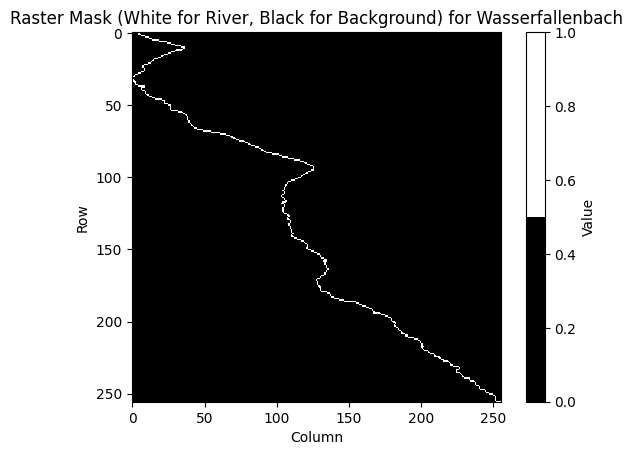

492
Bounds for Eibachli: [2583448.95255307 1176680.13913975 2584114.09355396 1177926.20914048]
Min value: 0.0
Max value: 1.0
shape: (256, 256)
done Eibachli


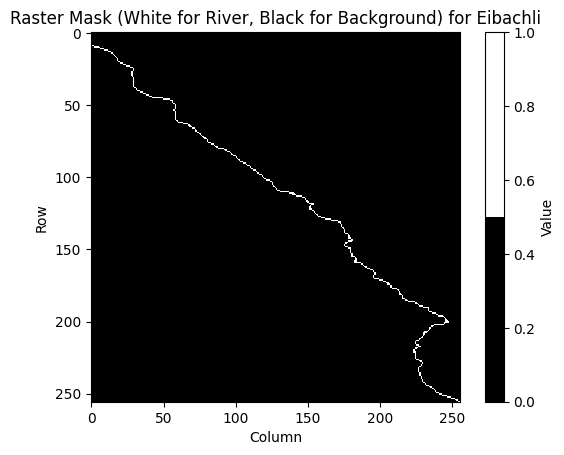

422
Bounds for Bisse-Neuf: [2601731.81458359 1120965.14810947 2604201.50058574 1121554.20710932]
Min value: 0.0
Max value: 1.0
shape: (256, 256)
done Bisse-Neuf


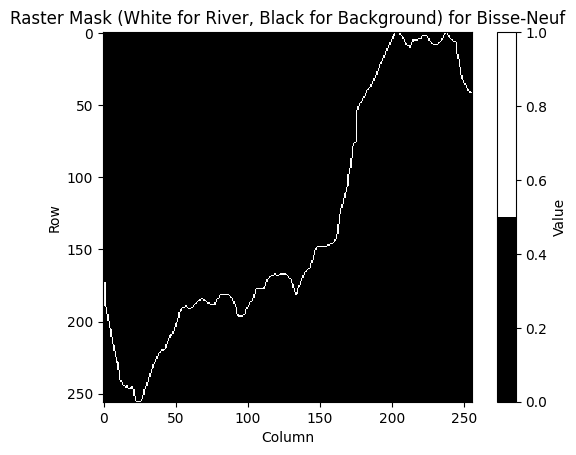

579
Bounds for LaVenoge_shapefile: [2517765.00049757 1145382.00113829 2531987.97451165 1167674.95414947]
Min value: 0.0
Max value: 1.0
shape: (256, 256)
done LaVenoge_shapefile


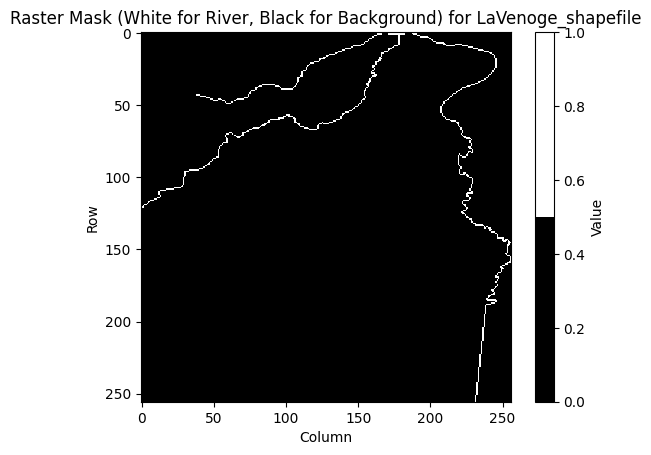

829
Bounds for le_boiron2: [2519377.12049971 1149326.98514098 2526383.78050732 1157897.39914635]
Min value: 0.0
Max value: 1.0
shape: (256, 256)
done le_boiron2


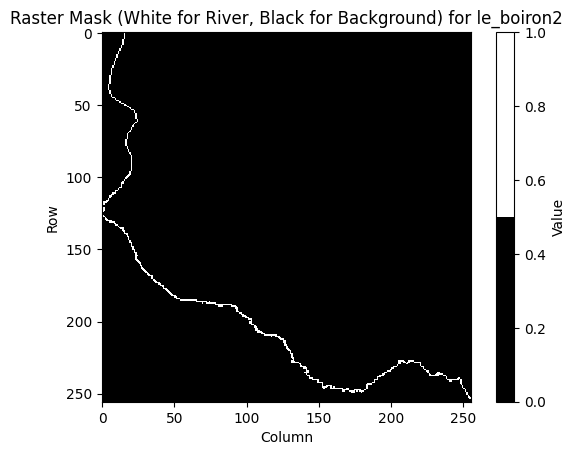

594
Bounds for I_Custiell: [2686980.18065851 1119920.83008652 2687366.89765876 1120728.85008696]
Min value: 0.0
Max value: 1.0
shape: (256, 256)
done I_Custiell


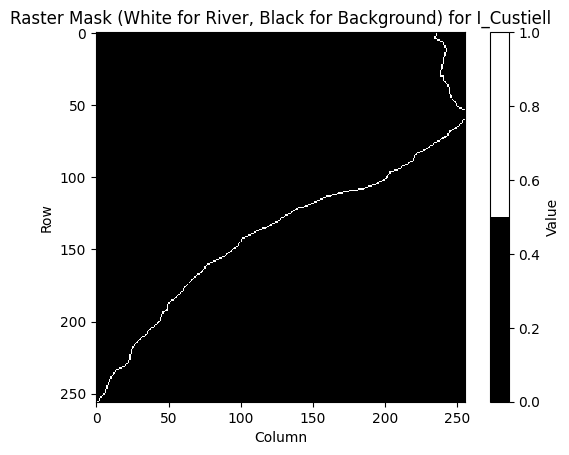

356
Bounds for La_Paudeze: [2540853.74452063 1150628.56213839 2545255.75952359 1155353.38713945]
Min value: 0.0
Max value: 1.0
shape: (256, 256)
done La_Paudeze


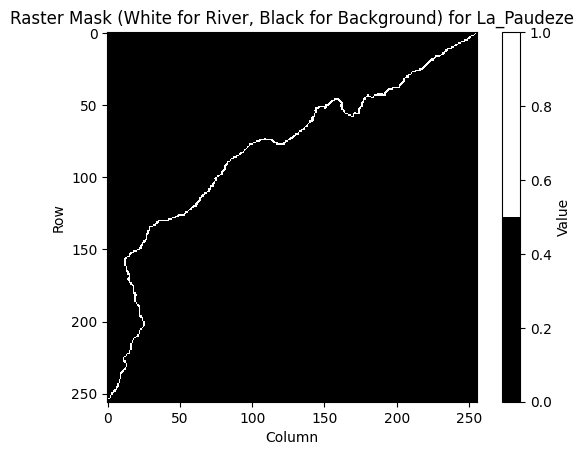

531
Bounds for Zauggenbach: [2706482.93364361 1222005.16512252 2706872.20664375 1223614.65412316]
Min value: 0.0
Max value: 1.0
shape: (256, 256)
done Zauggenbach


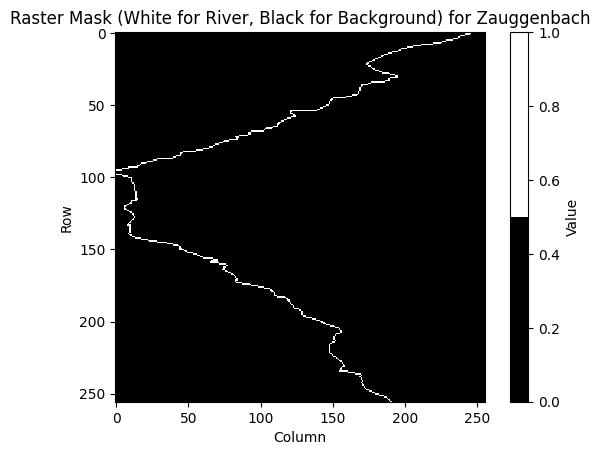

648
Bounds for Aletenbach: [2634018.64157584 1254778.59915552 2635575.72157714 1255024.49515582]
Min value: 0.0
Max value: 1.0
shape: (256, 256)
done Aletenbach


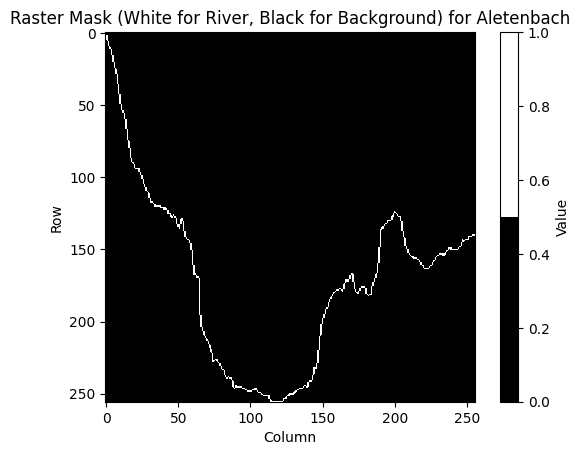

620
Bounds for Alplibach: [2777154.41470132 1208877.51909475 2778147.91370096 1212224.45709536]
Min value: 0.0
Max value: 1.0
shape: (256, 256)
done Alplibach


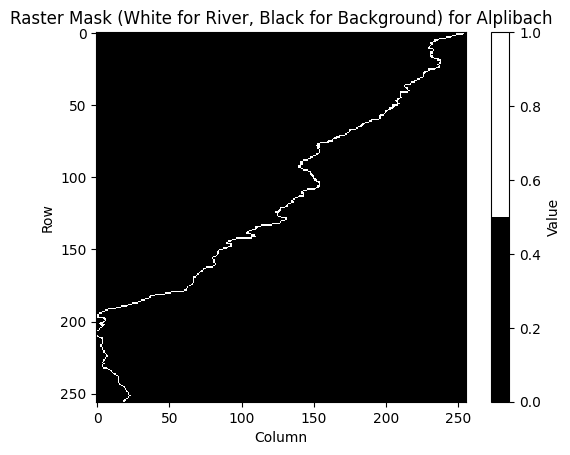

532
Bounds for Plattenbach: [2693309.63564496 1185001.73211328 2695045.59064577 1186172.46111286]
Min value: 0.0
Max value: 1.0
shape: (256, 256)
done Plattenbach


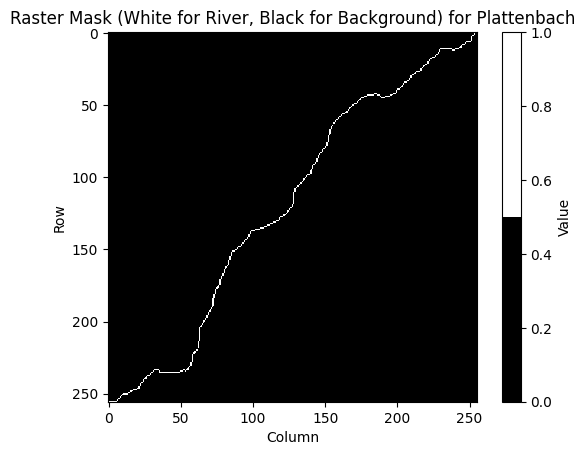

359
Bounds for swissTLMboiron: [2518401.91049879 1148164.44714075 2527392.5135078  1159309.10314708]
Min value: 0.0
Max value: 1.0
shape: (256, 256)
done swissTLMboiron


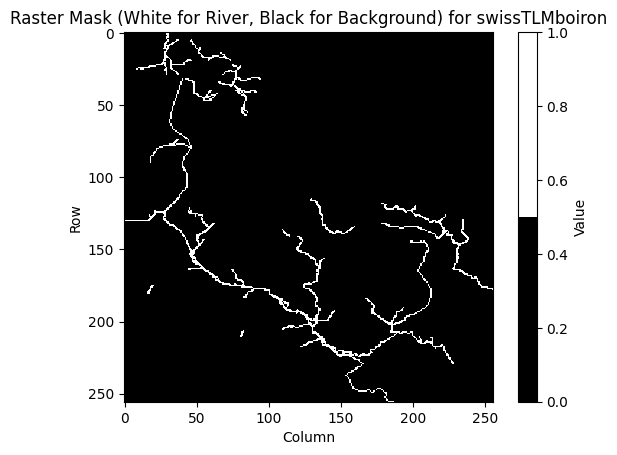

1872
Bounds for LaBroye_shapefile: [2547335.00052539 1153354.00113637 2575689.00054055 1204875.00115583]
Min value: 0.0
Max value: 1.0
shape: (256, 256)
done LaBroye_shapefile


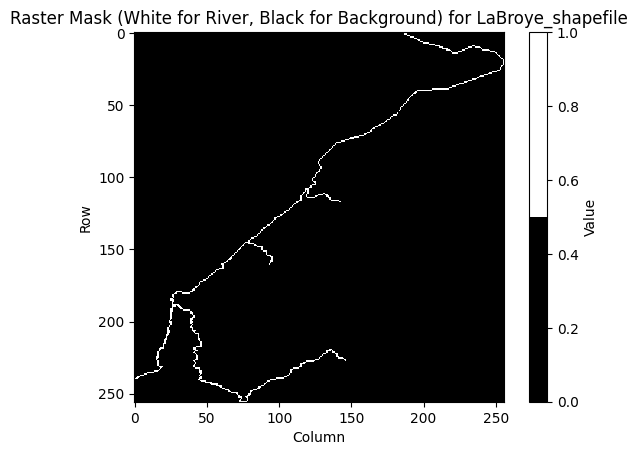

719


In [17]:
# Desired output size
output_shape = (256, 256)
binary_masks = []
for k, river in rivers.items():
    river_original = river.to_crs(original_crs)

    # Check the bounds of the filtered river geometries
    x_min, y_min, x_max, y_max = list(river_original.total_bounds)
    print(f"Bounds for {k}: {river_original.total_bounds}")
    
    # Create the transform for 256x256 grid based on the bounds
    grid_width = output_shape[1]  # 256 pixels for width
    grid_height = output_shape[0]  # 256 pixels for height
    x_res = (x_max - x_min) / grid_width
    y_res = (y_max - y_min) / grid_height

    transform = from_origin(x_min, y_max, x_res, y_res)

    # Convert the LineStrings to a list of geometries for rasterization
    line_geometries = river_original.geometry.values

    # Create a raster mask for the output shape (256x256)
    out_shape = output_shape
    raster_array = np.zeros(out_shape)

    # Rasterize each LineString into the grid
    for i, geom in enumerate(line_geometries):
        if geom.is_empty:
            print(f"Empty geometry for {k}, skipping.")
            continue
        shape = (geom, 1)  # Assign a value of 1 for each line
        temp_mask = rasterize([shape], out_shape=out_shape, transform=transform)
        raster_array += temp_mask

    # Binarize the raster
    binary_mask = np.where(raster_array > 0.0, 1.0, 0.0)
    print(f"Min value: {binary_mask.min()}")
    print(f"Max value: {binary_mask.max()}")
    print('shape:', binary_mask.shape)
    binary_masks.append(binary_mask)
    print('done', k)

    # Define a colormap (black for background, white for river)
    cmap = plt.cm.colors.ListedColormap(['black', 'white'])
    
    # Display the rasterized mask with a custom colormap
    plt.imshow(binary_mask, cmap=cmap)
    plt.colorbar(label='Value')
    plt.title(f'Raster Mask (White for River, Black for Background) for {k}')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()
    print(len(np.nonzero(binary_mask.reshape(-1))[0]))

    # Save the raster
    save_raster(raster_array, f'../data/external/raster_masks/raster_mask_bw_{k}.tif', river)


#### Mask the water temperature data to Le Boiron river

 Quadrant mask to assign to its correspondent values

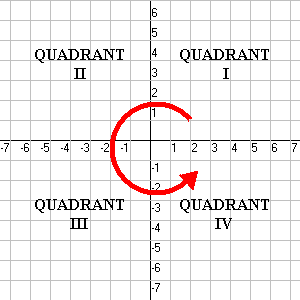

In [18]:
raw_data_path = '../data/raw/wt'

os.makedirs(raw_data_path, exist_ok=True)
clear_directory(raw_data_path)

for r in rivers.keys():
  dest_dir = os.path.join(raw_data_path, r)
  os.makedirs(dest_dir, exist_ok=True)
  clear_directory(dest_dir)

In [19]:
for i, (k, river) in enumerate(rivers.items()):
    destination_folder = f'../data/raw/wt/{k}/'
    closest_points = closest[k]
    dates = list(closest_points['upper_right']['time'].unique())
    for d in dates:
        ur = closest_points['upper_right'][closest_points['upper_right'].time == d]
        ul = closest_points['upper_left'][closest_points['upper_left'].time == d]
        ll = closest_points['lower_left'][closest_points['lower_left'].time == d]
        lr = closest_points['lower_right'][closest_points['lower_right'].time == d]
        binary_mask = binary_masks[i]

        height, width = binary_mask.shape

        # Define los límites de los cuadrantes
        half_height = height // 2
        half_width = width // 2

        # Crea una máscara para cada cuadrante
        mask_q1 = np.zeros_like(binary_mask, dtype=np.float32)
        mask_q2 = np.zeros_like(binary_mask, dtype=np.float32)
        mask_q3 = np.zeros_like(binary_mask, dtype=np.float32)
        mask_q4 = np.zeros_like(binary_mask, dtype=np.float32)

        value_q1 = ur.waterTemperature  # Valor específico para el cuadrante 1
        value_q2 = ul.waterTemperature  # Valor específico para el cuadrante 2
        value_q3 = ll.waterTemperature  # Valor específico para el cuadrante 3
        value_q4 = lr.waterTemperature

        mask_q1[0:half_height, 0:half_width] = np.where(binary_mask[0:half_height, 0:half_width] > 0, value_q1, 0.0)
        mask_q2[0:half_height, half_width:] = np.where(binary_mask[0:half_height, half_width:] > 0, value_q2, 0.0)
        mask_q3[half_height:, 0:half_width] = np.where(binary_mask[half_height:, 0:half_width] > 0, value_q3, 0.0)
        mask_q4[half_height:, half_width:] = np.where(binary_mask[half_height:, half_width:] > 0, value_q4, 0.0)


        combined_mask = mask_q1 + mask_q2 + mask_q3 + mask_q4

        save_raster(combined_mask, f'{destination_folder}raster_mask_temp_{d.strftime("%Y-%m")}.tif', river)
        

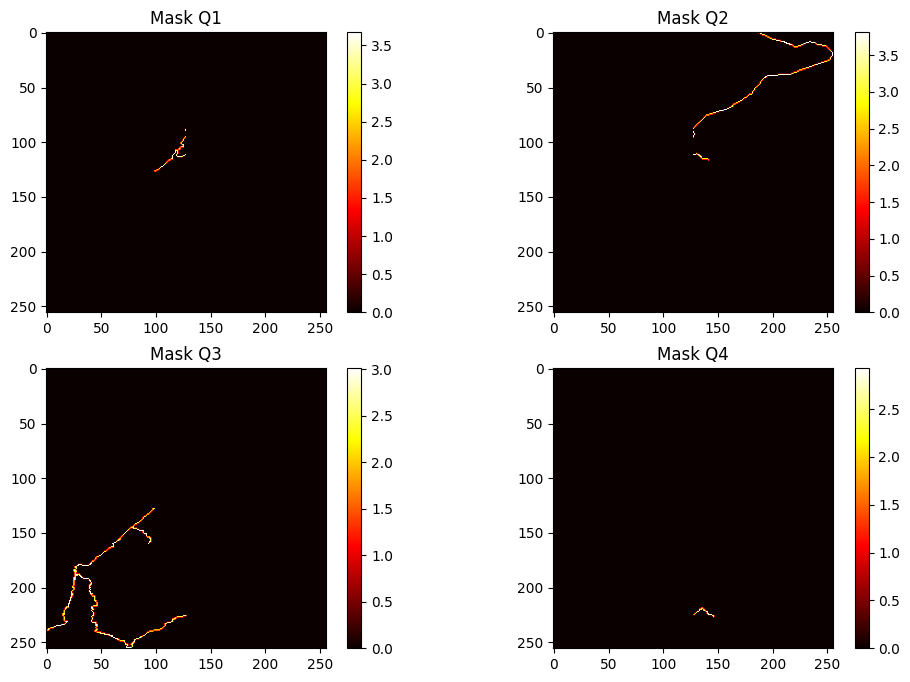

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Mask Q1')
plt.imshow(mask_q1, cmap='hot')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.title('Mask Q2')
plt.imshow(mask_q2, cmap='hot')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.title('Mask Q3')
plt.imshow(mask_q3, cmap='hot')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.title('Mask Q4')
plt.imshow(mask_q4, cmap='hot')
plt.colorbar()

plt.show()


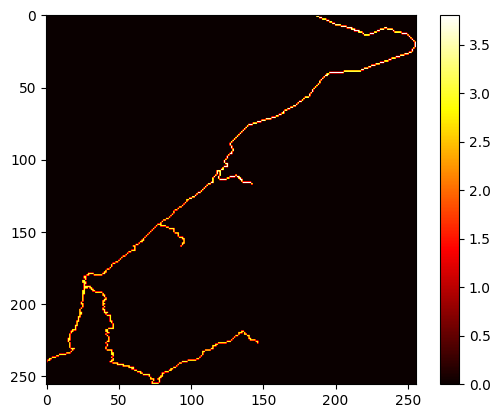

In [21]:
plt.imshow(combined_mask,cmap='hot')#, cmap='viridis')
plt.colorbar()
plt.show()

## Obtain NDVI images

In [22]:
evalscript_ndvi = """//VERSION=3

function setup() {
    return {

      input: [{
        bands: ["B04", "B05"],
      }],
      output: [{
          id: "default",
          bands: 1,
          sampleType: SampleType.FLOAT32
        },
        {
          id: "ndvi_image",
          bands: 3,
          sampleType: SampleType.AUTO
        }
      ]
    }
  }


  function evaluatePixel(sample) {
    let ndvi = (sample.B05 - sample.B04) / (sample.B05 + sample.B04)

    if (ndvi < -0.5) image = [0.05, 0.05, 0.05]
    else if (ndvi < -0.2) image = [0.75, 0.75, 0.75]
    else if (ndvi < -0.1) image = [0.86, 0.86, 0.86]
    else if (ndvi < 0) image = [0.92, 0.92, 0.92]
    else if (ndvi < 0.025) image = [1, 0.98, 0.8]
    else if (ndvi < 0.05) image = [0.93, 0.91, 0.71]
    else if (ndvi < 0.075) image = [0.87, 0.85, 0.61]
    else if (ndvi < 0.1) image = [0.8, 0.78, 0.51]
    else if (ndvi < 0.125) image = [0.74, 0.72, 0.42]
    else if (ndvi < 0.15) image = [0.69, 0.76, 0.38]
    else if (ndvi < 0.175) image = [0.64, 0.8, 0.35]
    else if (ndvi < 0.2) image = [0.57, 0.75, 0.32]
    else if (ndvi < 0.25) image = [0.5, 0.7, 0.28]
    else if (ndvi < 0.3) image = [0.44, 0.64, 0.25]
    else if (ndvi < 0.35) image = [0.38, 0.59, 0.21]
    else if (ndvi < 0.4) image = [0.31, 0.54, 0.18]
    else if (ndvi < 0.45) image = [0.25, 0.49, 0.14]
    else if (ndvi < 0.5) image = [0.19, 0.43, 0.11]
    else if (ndvi < 0.55) image = [0.13, 0.38, 0.07]
    else if (ndvi < 0.6) image = [0.06, 0.33, 0.04]
    else image = [0, 0.27, 0]

    return {
      default: [ndvi],
      ndvi_image: image
    }
  }"""

In [23]:
raw_data_path = '../data/raw/ndvi'

os.makedirs(raw_data_path, exist_ok=True)
clear_directory(raw_data_path)

for r in rivers.keys():
  dest_dir = os.path.join(raw_data_path, r)
  os.makedirs(dest_dir, exist_ok=True)
  clear_directory(dest_dir)

#### Save images

In [24]:
import tarfile

for k, river in rivers.items():
    destination_folder = f'../data/raw/ndvi/{k}'
    get_data(river, evalscript_ndvi, slots, 'ndvi', destination_folder)
    counter = 0
    # Recorre todas las subcarpetas en la carpeta principal
    for subdir, dirs, files in os.walk(destination_folder):
        for file in files:
            # Si el archivo es un .tar
            if file.endswith('.tar'):
                print(f'Archivo {file} encontrado en {subdir}')
                # Construye la ruta completa del archivo tar
                tar_file_path = os.path.join(subdir, file)

                # Define el nuevo nombre de la carpeta donde se extraerán los archivos
                extract_folder_name = f'extracted_{slots[counter][0][:7]}'
                extract_folder_path = os.path.join(destination_folder, extract_folder_name)

                # Crea el directorio si no existe
                if not os.path.exists(extract_folder_path):
                    os.makedirs(extract_folder_path)

                # Abre y descomprime el archivo .tar
                with tarfile.open(tar_file_path, 'r') as tar:
                    tar.extractall(path=extract_folder_path)

                print(f'Archivo {file} descomprimido en {extract_folder_path}')

                # Busca el archivo .tif dentro de la carpeta descomprimida
                for root, dirs, extracted_files in os.walk(extract_folder_path):
                    for extracted_file in extracted_files:
                        if extracted_file.endswith('.tif'):
                            # Ruta completa del archivo .tif
                            tiff_file_path = os.path.join(root, extracted_file)

                            # Define la ruta de destino fuera de la carpeta
                            new_tiff_file_path = os.path.join(destination_folder, extracted_file)

                            new_file_name = f'ndvi_{slots[counter][0][:7]}.tiff'
                            new_file_path = os.path.join(destination_folder, new_file_name)

                            # Mueve el archivo .tif fuera de la carpeta descomprimida
                            shutil.move(tiff_file_path, new_file_path)

                            print(f'Archivo {extracted_file} movido a {new_file_path}')

                # Incrementa el contador
                counter += 1
                
    for subdir, dirs, files in os.walk(destination_folder):
        for dir in dirs:
            dir_path = os.path.join(subdir, dir)
            shutil.rmtree(dir_path, ignore_errors=True)


Archivo response.tar encontrado en ../data/raw/ndvi/Wasserfallenbach/aacc0c5b91f5de6479620e34a13c0aff
Archivo response.tar descomprimido en ../data/raw/ndvi/Wasserfallenbach/extracted_2011-01
Archivo default.tif movido a ../data/raw/ndvi/Wasserfallenbach/ndvi_2011-01.tiff
Archivo response.tar encontrado en ../data/raw/ndvi/Wasserfallenbach/6dcbe70f917dfc98f2a71d495f6fd517
Archivo response.tar descomprimido en ../data/raw/ndvi/Wasserfallenbach/extracted_2011-02
Archivo default.tif movido a ../data/raw/ndvi/Wasserfallenbach/ndvi_2011-02.tiff
Archivo response.tar encontrado en ../data/raw/ndvi/Wasserfallenbach/833a5514268974b9861854f08116cc45
Archivo response.tar descomprimido en ../data/raw/ndvi/Wasserfallenbach/extracted_2011-03
Archivo default.tif movido a ../data/raw/ndvi/Wasserfallenbach/ndvi_2011-03.tiff
Archivo response.tar encontrado en ../data/raw/ndvi/Wasserfallenbach/a7b960b2eaab11b47394ceba0fbf0c1a
Archivo response.tar descomprimido en ../data/raw/ndvi/Wasserfallenbach/extract

/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sentinelhub/download/sentinelhub_client.py:93: SHRateLimitWarning: Download rate limit hit
  warnings.warn("Download rate limit hit", category=SHRateLimitWarning)
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sentinelhub/download/sentinelhub_client.py:93: SHRateLimitWarning: Download rate limit hit
  warnings.warn("Download rate limit hit", category=SHRateLimitWarning)
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sentinelhub/download/sentinelhub_client.py:93: SHRateLimitWarning: Download rate limit hit
  warnings.warn("Download rate limit hit", category=SHRateLimitWarning)
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sentinelhub/download/sentinelhub_client.py:93: SHRateLimitWarning: Download rate limit hit
  warnings.warn("Download rate limit hit", category=SHRateLimitWarning)
/Users/ruthparajo/Library/Python/3.9/lib/python/site-packages/sentinelhub/download/sentinelhub_clien

Archivo response.tar encontrado en ../data/raw/ndvi/LaBroye_shapefile/e9e62abc684601554dd5558427b18698
Archivo response.tar descomprimido en ../data/raw/ndvi/LaBroye_shapefile/extracted_2011-01
Archivo default.tif movido a ../data/raw/ndvi/LaBroye_shapefile/ndvi_2011-01.tiff
Archivo response.tar encontrado en ../data/raw/ndvi/LaBroye_shapefile/cbc2eddbef704b08161ba0de29c3cd59
Archivo response.tar descomprimido en ../data/raw/ndvi/LaBroye_shapefile/extracted_2011-02
Archivo default.tif movido a ../data/raw/ndvi/LaBroye_shapefile/ndvi_2011-02.tiff
Archivo response.tar encontrado en ../data/raw/ndvi/LaBroye_shapefile/55f63bee52d215ff3761e8ba442b64e7
Archivo response.tar descomprimido en ../data/raw/ndvi/LaBroye_shapefile/extracted_2011-03
Archivo default.tif movido a ../data/raw/ndvi/LaBroye_shapefile/ndvi_2011-03.tiff
Archivo response.tar encontrado en ../data/raw/ndvi/LaBroye_shapefile/faa82e7248a26560a71a87891ccd22f5
Archivo response.tar descomprimido en ../data/raw/ndvi/LaBroye_shapef

## Discharge and slope data

In [ ]:
file_path = '../data/external/slope_discharge/Typisierung_LV95/typisierung.gpkg'
gdf = gpd.read_file(file_path)

In [ ]:
gdf.geom_type

0         MultiLineString
1         MultiLineString
2         MultiLineString
3         MultiLineString
4         MultiLineString
               ...       
178537    MultiLineString
178538    MultiLineString
178539    MultiLineString
178540    MultiLineString
178541    MultiLineString
Length: 178542, dtype: object

In [ ]:
gdf

,OBJECTID,OBJECTID_GWN25,GROSSERFLUSS,BIOGEO,HOEHE,ABFLUSS,GEFAELLE,GEO,CODE,GEWAESSERTYP,...,Discharge_Source,Discharge_Quality,Slope,Slope_Quality,IBCHQREGIM,IBCH_CORR,QUALI_D,QUALI_F,SHAPE_Length,geometry
0,1,1501715,NA,Mittelland,kollin,gross,mittelsteil,karbonatisch,21321,21321,...,GAB_EZGG_CH,2.0,0.601911,1.0,17,0.06,! (FlaecheEZG<3km2),! (SurfaceBV<3km2),171.544471,"MULTILINESTRING ((2693929.175 1288494.655, 269..."
1,2,1507498,NA,Mittelland,kollin,klein,mittelsteil,karbonatisch,21121,21121,...,GAB_EZGG_CH,2.0,2.312250,1.0,8,0.22,"! (FlaecheEZG<3km2, Nebenarm, ManuelleModif)","! (SurfaceBV<3km2, Cours_secondaire, Modif_man...",447.355304,"MULTILINESTRING ((2614591.957 1267608.294, 261..."
2,3,1510468,NA,Mittelland,kollin,klein,steil,karbonatisch,21131,21131,...,GAB_EZGG_CH,2.0,8.950240,1.0,17,0.06,"! (FlaecheEZG<3km2, Nebenarm)","! (SurfaceBV<3km2, Cours_secondaire)",119.316500,"MULTILINESTRING ((2666416.575 1269007.483, 266..."
3,4,1512687,NA,Mittelland,kollin,klein,mittelsteil,karbonatisch,21121,21121,...,GAB_EZGG_CH,2.0,3.307020,1.0,17,0.06,! (FlaecheEZG<3km2),! (SurfaceBV<3km2),380.408417,"MULTILINESTRING ((2719039.059 1274689.239, 271..."
4,5,1513236,NA,Mittelland,kollin,mittel,mittelsteil,karbonatisch,21221,21221,...,MQ_GWN_CH,1.0,1.936970,1.0,17,0.06,None,None,673.858755,"MULTILINESTRING ((2712465.763 1266640.319, 271..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178537,178538,16517699,NA,Zentralalpen,alpin,klein,steil,NA,0,0,...,GAB_EZGG_CH,2.0,18.899500,1.0,6,0.40,None,None,150.956605,"MULTILINESTRING ((2608416.566 1136462.391, 260..."
178538,178539,16828342,NA,Alpennordflanke,montan,gross,flach,karbonatisch,32311,0,...,MQ_GWN_CH,1.0,0.112550,1.0,7,0.30,None,None,288.001794,"MULTILINESTRING ((2738347.143 1227972.269, 273..."
178539,178540,16842921,NA,Alpennordflanke,montan,mittel,steil,karbonatisch,32231,32231,...,GAB_EZGG_CH,2.0,41.173599,1.0,8,0.22,None,None,584.100407,"MULTILINESTRING ((2714906.707 1223693.225, 271..."
178540,178541,16887809,NA,Alpennordflanke,montan,klein,mittelsteil,karbonatisch,32121,32121,...,GAB_EZGG_CH,2.0,3.313740,1.0,8,0.22,None,None,163.986972,"MULTILINESTRING ((2754589.855 1247354.055, 275..."


<Axes: >

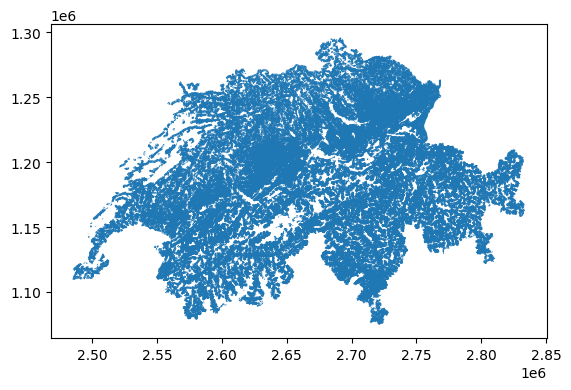

In [ ]:
gdf.plot()

In [ ]:
gdf_wgs84 = gdf.to_crs(rivers['LaBroye_shapefile'].crs)

In [ ]:
# Filtrar el segundo GeoDataFrame usando la geometría del primero
gdf_filtered = gdf_wgs84[gdf_wgs84.intersects(rivers['LaBroye_shapefile'].unary_union)]
gdf_filtered

,OBJECTID,OBJECTID_GWN25,GROSSERFLUSS,BIOGEO,HOEHE,ABFLUSS,GEFAELLE,GEO,CODE,GEWAESSERTYP,...,Discharge_Source,Discharge_Quality,Slope,Slope_Quality,IBCHQREGIM,IBCH_CORR,QUALI_D,QUALI_F,SHAPE_Length,geometry
13025,13026,1669134,NA,Mittelland,montan,mittel,mittelsteil,karbonatisch,22221,22221,...,MQ_GWN_CH,1.0,1.924040,1.0,8,0.22,None,None,1719.682429,"MULTILINESTRING ((6.88822 46.55813, 6.88816 46..."
13056,13057,1755687,NA,Mittelland,montan,mittel,mittelsteil,karbonatisch,22221,22221,...,MQ_GWN_CH,1.0,0.792034,1.0,17,0.06,None,None,770.163042,"MULTILINESTRING ((6.77877 46.57164, 6.77882 46..."
13241,13242,1669394,NA,Mittelland,montan,gross,mittelsteil,karbonatisch,22321,0,...,MQ_GWN_CH,1.0,2.202790,1.0,12,-0.24,None,None,190.863188,"MULTILINESTRING ((6.85532 46.54050, 6.85541 46..."
13882,13883,1669407,NA,Mittelland,montan,gross,mittelsteil,karbonatisch,22321,0,...,MQ_GWN_CH,1.0,1.344670,1.0,8,0.22,None,None,375.549580,"MULTILINESTRING ((6.86486 46.53278, 6.86493 46..."
14306,14307,1589674,NA,Mittelland,kollin,gross,flach,karbonatisch,21311,21311,...,GAB_EZGG_CH,2.0,0.100000,2.0,8,0.22,Quelle:NAWA,Source:NAWA,864.500877,"MULTILINESTRING ((7.06113 46.97265, 7.06080 46..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176323,176324,1648686,NA,Mittelland,kollin,mittel,mittelsteil,karbonatisch,21221,21221,...,MQ_GWN_CH,1.0,2.131070,1.0,12,-0.24,None,None,140.373888,"MULTILINESTRING ((6.78691 46.63177, 6.78712 46..."
176954,176955,1669398,NA,Mittelland,montan,gross,mittelsteil,karbonatisch,22321,0,...,MQ_GWN_CH,1.0,1.208450,1.0,12,-0.24,None,None,1519.837058,"MULTILINESTRING ((6.86009 46.53090, 6.85977 46..."
177788,177789,1609083,NA,Mittelland,kollin,gross,flach,karbonatisch,21311,21311,...,MQ_GWN_CH,1.0,0.100000,2.0,12,-0.24,None,None,488.666394,"MULTILINESTRING ((7.00550 46.88585, 7.00566 46..."
177942,177943,1669375,NA,Mittelland,montan,gross,mittelsteil,karbonatisch,22321,0,...,MQ_GWN_CH,1.0,0.529131,1.0,12,-0.24,None,None,297.659972,"MULTILINESTRING ((6.82233 46.55532, 6.82224 46..."


<Axes: >

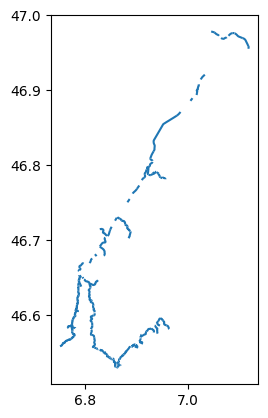

In [ ]:
gdf_filtered.plot()

## Obtain all rivers

In [ ]:
import subprocess

# Ruta al archivo shapefile de entrada
input_shapefile = '../data/external/shp/swiss_rivers'

# Usar ogrinfo para listar los valores en el campo NAME
command = [
    'ogrinfo',
    '-q',  # Ejecutar en modo silencioso excepto los resultados
    '-geom=NO',  # No mostrar las geometrías
    '-sql', 'SELECT NAME FROM swissTLM3D_TLM_FLIESSGEWAESSER',  # Ejecutar una consulta SQL para seleccionar la columna NAME
    input_shapefile
]

# Ejecutar el comando y capturar la salida
result = subprocess.run(command, capture_output=True, text=True)

# Procesar la salida para obtener los nombres de los ríos
river_names = set()
for line in result.stdout.split('\n'):
    if 'NAME (String)' in line:  # Buscar las líneas que contienen los nombres
        name = line.split('=')[-1].strip()  # Extraer el nombre del río
        river_names.add(name)  # Añadirlo a un set para obtener nombres únicos

# Mostrar los nombres únicos de los ríos
print(f'Nombres únicos de los ríos: {river_names}')


Nombres únicos de los ríos: {'La Paudèze', 'Aletenbach', 'Bisse-Neuf', 'Älplibach', 'Eibächli', 'Wasserfallenbach', 'I Custiéll', "L'Hongrin", 'Zauggenbach', 'Plattenbach', 'Gwindlibach', 'Morea', 'Durach', 'Starchenbach', 'Spitzwaldbach', 'La Foirause', 'Haagbach', 'Ijentaler Bach', 'Dischmàbach', 'Rià de Purtulina', 'Verenenmöslibach', 'Ri Tomp', 'Haseseekanal', 'Ri della Froda', 'Alte Aare', 'Manebächli', 'Tschajetu-Wasserleitu', 'Gerenbach', 'Wandelbach', 'Hoschwerzibach', 'Bildjibach', 'Strängenbach', 'Bernhardsbach', 'Minster', 'R. dei Gioghi', 'Rià de Ciarin', 'Lattenbach', 'Luar', 'Riale di Bri', "Ruisseau de l'Abbaye", 'Kapellbach', 'Ri di Calonico', 'Ual da Val', 'Ruisseau du Petit Mology', 'Zimmertalbach', 'Le Merdechon', 'La Lizerne de Derborence', 'Le Rebord', 'Gärstenbach', 'Stäuberbach', 'Riana', 'Zugbächli', 'Giesse', 'Sarneraa', 'Schwendebach', 'Tsene de Terty', 'Schlierebach', "Nant d'Avril", 'Rohrbergbach', 'Pfendelbach', 'Ruisseau des Morteys', 'Reno di Medel | Rein

In [ ]:
len(river_names)

5100

In [ ]:
river_names_filt = list(river_names)[:10]
len(river_names_filt)

10

In [ ]:
import unidecode
def clean_name(river_name):
    # Eliminar acentos
    river_name_clean = unidecode.unidecode(river_name)
    
    # Reemplazar espacios con guiones bajos
    river_name_clean = river_name_clean.replace(' ', '_')
    
    # Eliminar apóstrofes y otros caracteres especiales
    river_name_clean = river_name_clean.replace("'", "").replace('"', "")
    
    return river_name_clean

In [ ]:
output_folder = '../data/external/shp/rivers/'

# Filtrar y exportar cada río individualmente
for river_name in river_names_filt:
    # Definir el nombre del shapefile de salida para cada río
    safe_river_name = clean_name(river_name)  # Asegurarse de que no haya espacios en el nombre del archivo
    
    path_river = os.path.join(output_folder, safe_river_name)
    os.makedirs(path_river, exist_ok=True)
    clear_directory(path_river)

    output_shapefile = f'{path_river}/{safe_river_name}.shp'
    
    # Comando ogr2ogr para filtrar y exportar el shapefile
    command = [
        'ogr2ogr',
        '-where', f"NAME = '{river_name}'",  # Filtrar por el nombre del río
        output_shapefile,
        input_shapefile
    ]
    
    # Ejecutar el comando
    subprocess.run(command)
    print(f'Shapefile para {river_name} creado: {output_shapefile}')


Shapefile para La Paudèze creado: ../data/external/shp/rivers/La_Paudeze/La_Paudeze.shp
Shapefile para Aletenbach creado: ../data/external/shp/rivers/Aletenbach/Aletenbach.shp
Shapefile para Bisse-Neuf creado: ../data/external/shp/rivers/Bisse-Neuf/Bisse-Neuf.shp
Shapefile para Älplibach creado: ../data/external/shp/rivers/Alplibach/Alplibach.shp
Shapefile para Eibächli creado: ../data/external/shp/rivers/Eibachli/Eibachli.shp
Shapefile para Wasserfallenbach creado: ../data/external/shp/rivers/Wasserfallenbach/Wasserfallenbach.shp
Shapefile para I Custiéll creado: ../data/external/shp/rivers/I_Custiell/I_Custiell.shp
Shapefile para L'Hongrin creado: ../data/external/shp/rivers/LHongrin/LHongrin.shp


ERROR 1: SQL Expression Parsing Error: syntax error, unexpected identifier, expecting end of string. Occurred around :
NAME = 'L'Hongrin'
          ^
ERROR 1: SetAttributeFilter(NAME = 'L'Hongrin') on layer 'swissTLM3D_TLM_FLIESSGEWAESSER' failed.


Shapefile para Zauggenbach creado: ../data/external/shp/rivers/Zauggenbach/Zauggenbach.shp
Shapefile para Plattenbach creado: ../data/external/shp/rivers/Plattenbach/Plattenbach.shp


In [ ]:
import subprocess

# Lista de ríos (por ejemplo, nombres o IDs que quieras filtrar)
river_names = ['Le Boiron']

# Ruta al archivo shapefile de entrada
input_shapefile = '../data/external/shp/swiss_rivers'

# Carpeta de salida para guardar los shapefiles filtrados
output_folder = '../data/external/shp/rivers/le_boiron2'

# Filtrar y exportar cada río individualmente
for river_name in river_names:
    # Definir el nombre del shapefile de salida para cada río
    output_shapefile = f'{output_folder}/{river_name}.shp'
    
    # Comando ogr2ogr para filtrar y exportar el shapefile
    command = [
        'ogr2ogr',
        '-where', f"NAME = '{river_name}'",
        output_shapefile,
        input_shapefile
    ]
    
    # Ejecutar el comando
    subprocess.run(command)
    print(f'Shapefile para {river_name} creado: {output_shapefile}')


Shapefile para Le Boiron creado: ../data/external/shp/rivers/le_boiron2/Le Boiron.shp
